In [3]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import scipy as sp
c = sp.constants.c # speed of light in SI
h = sp.constants.h # plank constant in SI
k = sp.constants.k # boltzmann constant in SI
sigma = sp.constants.Stefan_Boltzmann # in SI
# importing and setting our constants

### Q3: Show that in eqn (5), the integration of B over ν can be written as:

$B = \frac{2hc^2\nu^3}{e^{\frac{hc\nu}{kt}}-1} $   (1)

$ W = \pi \int_{0}^{\infty}Bd\nu = C_1 \int_{0}^{\infty}\frac{x^{3}}{e^x -1} dx$ (2)

Answer:

Let $x = \frac{hc\nu}{kt}$, the denomenator in (1) becomes:

$B = \frac{2hc^{2}\nu^{3}}{e^{x}-1} $, now we just have to adjust the numerator!

Rewriting again,

$B = \frac{C_1x^3}{e^x-1} = \frac{2hc^{2}\nu^{3}}{e^{x}-1} (?)$
 This is only true if we can show the numerators are equal!
 
$x^{3} = (\frac{hc\nu}{kt})^{3} \rightarrow \frac{h^3c^3\nu^3}{k^3t^3}$

$ \rightarrow  C_1 x^3 = C_1\frac{h^3c^3\nu^3}{k^3t^3}= 2hc^{2}\nu^{3}$

$\rightarrow C_1 \frac{h^3c^3\nu^3}{k^3t^3} = 2hc^{2}\nu^{3}$

$C_1  = \frac{2k^3t^3}{h^2c}$ 
For this choice of $C_1$ it works!

### Part B
Write a program to calculate the value for W given the temperature T. Explain
the method used to integrate over the infinite range, and give an estimate for the
accuracy of the method.

In [4]:
'''# pseudo code

# import scipy, numpy
# import constants from scipy (in SI units)

# write a function to calculate integrand (using the new integrand IE x)
    # Uses given T (in kelvin) to calculate a C_1 value
    # then returns value of integrand 
    
# numerically integrate using scipy quad
    # from 0 to np.inf
    # answer and accuracy estimate is included in quad
    # print values
    
'''

'# pseudo code\n\n# import scipy, numpy\n# import constants from scipy (in SI units)\n\n# write a function to calculate integrand (using the new integrand IE x)\n    # Uses given T (in kelvin) to calculate a C_1 value\n    # then returns value of integrand \n    \n# numerically integrate using scipy quad\n    # from 0 to np.inf\n    # answer and accuracy estimate is included in quad\n    # print values\n    \n'

In [28]:
# we shall use scipy's quad method 


# define f(x) the integrand 
def black_body_integrand(x, T=100):
   # C_1 = 2*(k**3  *T) /( h**2 *c )
    #C_1 * x**3 / ( np.exp(x)-1)
    #print(x)
    
    C_1 = 2 *np.pi* k**4 * T**4/ (h**3 *c **2)
   
    return C_1 * x**3 / ( np.exp(x)-1)

# integrate 
T=5000
W = sp.integrate.quad(black_body_integrand, a=0, 
                     b=np.inf, args=(T))

# wrapper



/tmp/ipykernel_7033/3474041872.py:12: RuntimeWarning: overflow encountered in exp
  return C_1 * x**3 / ( np.exp(x)-1)


In [29]:
sigma / (W[0] *T**-4)

0.9999999999674742

In [35]:
# fracitonal error estimation
T_arr = np.arange(0,10000)
sigma_arr = np.empty(len(T_arr))
frac_error_arr = np.empty(len(T_arr))

for i in range(len(T_arr)):
    W = sp.integrate.quad(black_body_integrand, a=0, 
                     b=np.inf, args=(T))
    sigma_arr[i] = W[0] *T**-4
    frac_error_arr[i] = W[1] / W[0]

/tmp/ipykernel_7033/3474041872.py:12: RuntimeWarning: overflow encountered in exp
  return C_1 * x**3 / ( np.exp(x)-1)


In [36]:
np.mean(sigma_arr)

5.670374419184433e-08

In [37]:
np.std(sigma_arr)

6.617444900424222e-24

In [40]:
np.mean(frac_error_arr)

2.2951266565892588e-17

In [39]:
np.std(frac_error_arr)

1.550963648536927e-25

[]

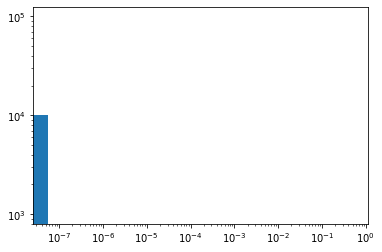

In [45]:
plt.hist(sigma_arr, bins=int(np.sqrt(len(T_arr))))
plt.loglog()

In [46]:
W[1]

0.014344541604149441